In [123]:
# Importing Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Models from scikit-learn
from sklearn.tree import DecisionTreeClassifier 

# Model Evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [124]:
# Dataset
#URL = "https://bit.ly/3kXTdox"
#df = pd.read_csv(URL, encoding='euc-kr')
warnings.filterwarnings('ignore')
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [126]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [127]:
df.duplicated().sum()

0

**Observations :**
1. In this dataset we have 5 features and 1 target columns and dataset has 150 rows and 6 columns.
2. All feature variable's datatype is numeric means integer or float but target variable is having datatype object.
3. Data has no null values and also there is no duplicates.
4. In Dataset, the column Id has no relavence with target as it has only continuous numeric values to give specific id to every row.

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


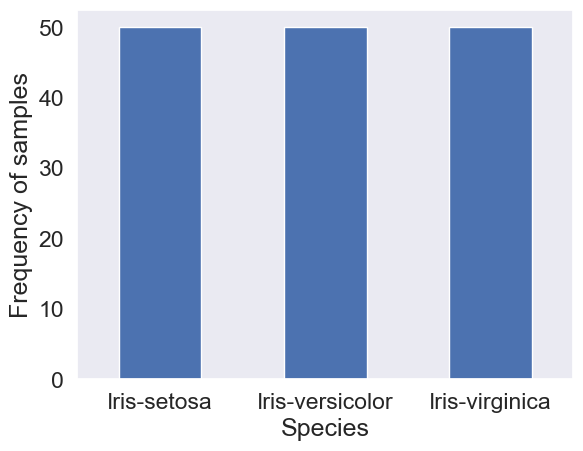

In [128]:
# Finding info. related to target variable
print(df["Species"].value_counts())
fig,axes = plt.subplots()
df['Species'].value_counts().plot(kind = 'bar')
plt.grid()
plt.xticks(rotation = 0)
plt.xlabel('Species')
plt.ylabel('Frequency of samples') 
plt.show()

**Observation :** In target variable, all cases species have 50 - 50 samples, so dataset is not a biased dataset to any specific species. 

* **Univariate Analysis**       
* **Bivariate Analysis**        
* **Multivariate Analysis**       

In [129]:
# Dropping Id columns as it is not required.
df.drop('Id',axis = 1,inplace= True)

**SepalLength** :

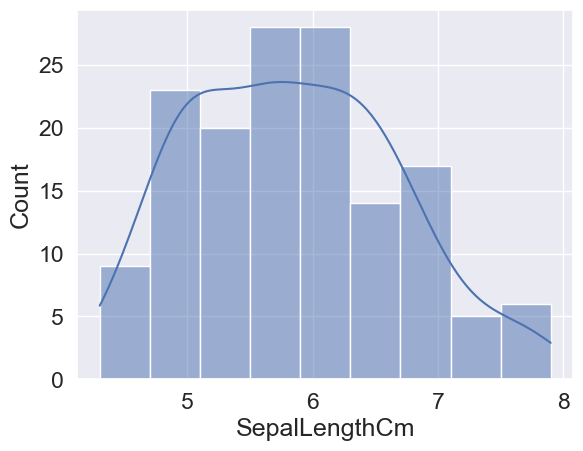

In [130]:
fig,axes = plt.subplots()
sns.histplot(df['SepalLengthCm'],kde = True);


In [131]:
object = df.groupby('Species')['SepalLengthCm']
print(object.mean())

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64


<Axes: >

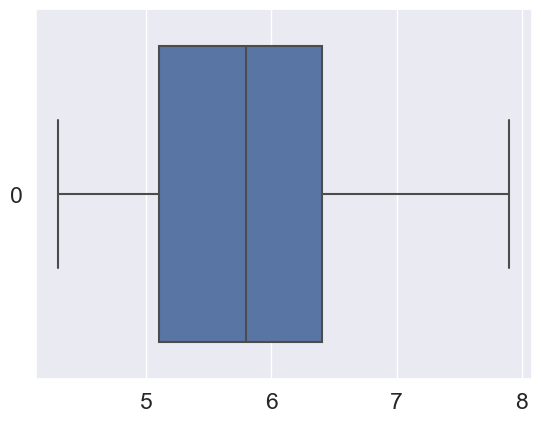

In [132]:
sns.boxplot(df['SepalLengthCm'], orient= 'h')

**Observatiions :**
1. As Dataset is uniformally distributed between three species  of iris flower. The average of sepal lenght is 5.843333 where :     
- For Iris-setosa average sepal length is 5.006.
- For Iris-versicolor average sepal length is 5.936.
- For Iris-virginica average sepal length is 6.588.

2. There is not Outliers present in sepal length column of iris dataset. 

**Sepal Width**

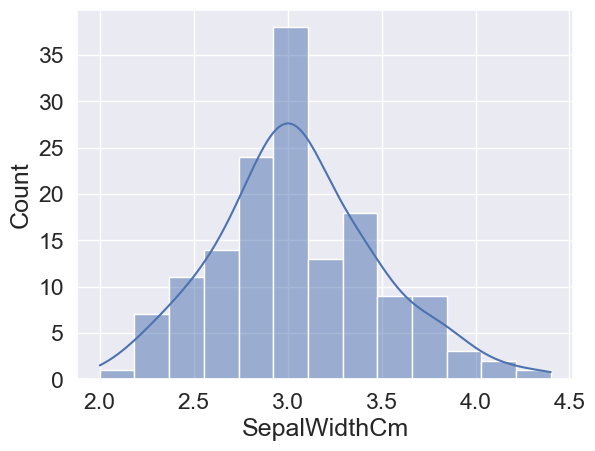

In [133]:
fig,axes = plt.subplots()
sns.histplot(df['SepalWidthCm'],kde = True);

In [134]:
object = df.groupby('Species')['SepalWidthCm']
print(object.mean())

Species
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: SepalWidthCm, dtype: float64


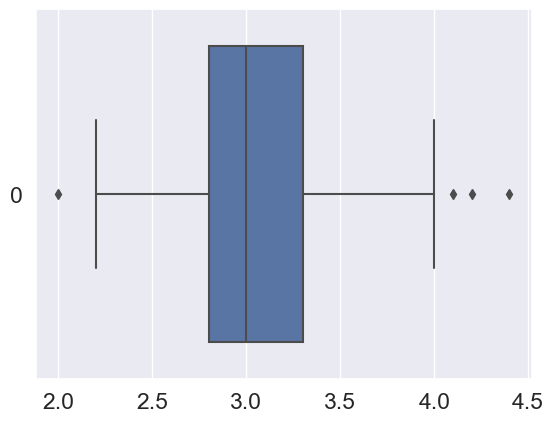

In [135]:
sns.boxplot(df['SepalWidthCm'], orient= 'h');

In [136]:
# Check for Ouliers rows
df[(df['SepalWidthCm'] <2.15) | (df['SepalWidthCm'] > 4) ]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


**Observatiions :**
1. As Dataset is uniformally distributed between three species  of iris flower. The average of sepal width is 3.054 where :     
- For Iris-setosa average sepal width is 3.418.
- For Iris-versicolor average sepal width is 2.770.
- For Iris-virginica average sepal width is 2.974.

2. There is Outliers present in sepal width column of iris dataset. As average sepal width for iris setosa is 3.418 and for specific case we have a row with sepal width of 4.4 cm. It may be specific case for iris setosa, 

**Petal Length** :

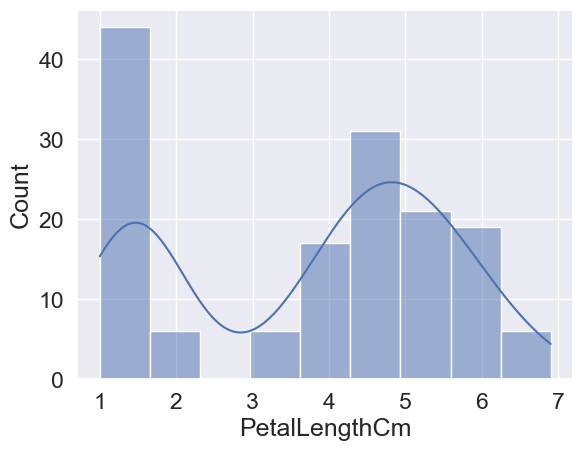

In [137]:
fig,axes = plt.subplots()
sns.histplot(df['PetalLengthCm'],kde = True);

In [138]:
object = df.groupby('Species')['PetalLengthCm']
print(object.mean())

Species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLengthCm, dtype: float64


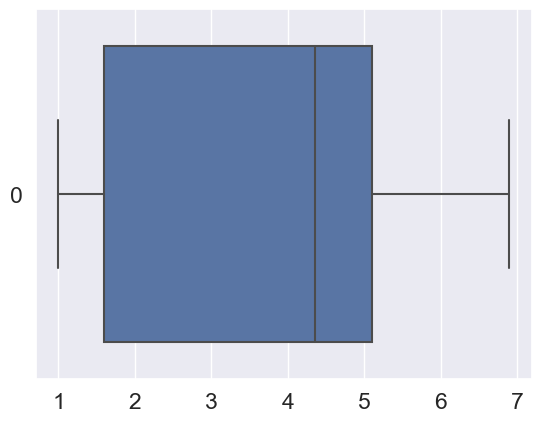

In [139]:
sns.boxplot(df['PetalLengthCm'], orient= 'h');

**Observatiions :**
1. As Dataset is uniformally distributed between three species  of iris flower. The average of petal lenght is 3.76 cm where :     
- For Iris-setosa average petal length is 1.464.
- For Iris-versicolor average petal length is 4.260.
- For Iris-virginica average petal length is 5.552.          
From This info. we can clearly make a criteria to distinguish Iris- setosa from other two species.

2. There is not Outliers present in petal length column of iris dataset. 

In [140]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**Petal Width**

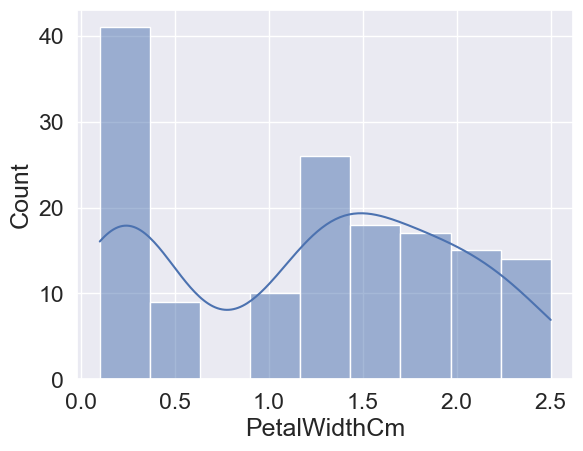

In [141]:
fig,axes = plt.subplots()
sns.histplot(df['PetalWidthCm'],kde = True);

In [142]:
object = df.groupby('Species')['PetalWidthCm']
print(object.mean())

Species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: PetalWidthCm, dtype: float64


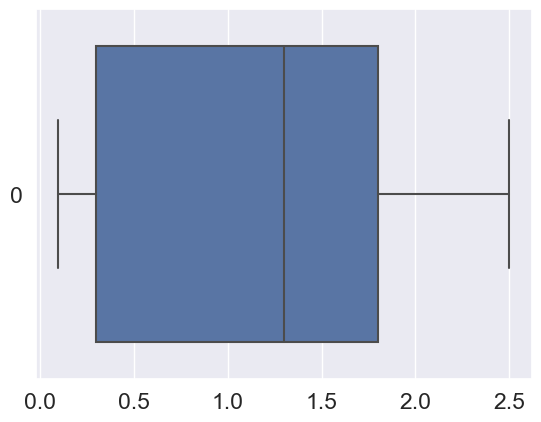

In [143]:
sns.boxplot(df['PetalWidthCm'], orient= 'h');

**Observatiions :**
1. As Dataset is uniformally distributed between three species  of iris flower. The average of petal width is 1.198 cm where :     
- For Iris-setosa average petal width is 0.244 cm.
- For Iris-versicolor average petal width is 1.326 cm.
- For Iris-virginica average petal width is 2.026 cm.          
From This info. we can clearly make a criteria to distinguish Iris- setosa from other two species.

2. There is not Outliers present in petal width column of iris dataset. 

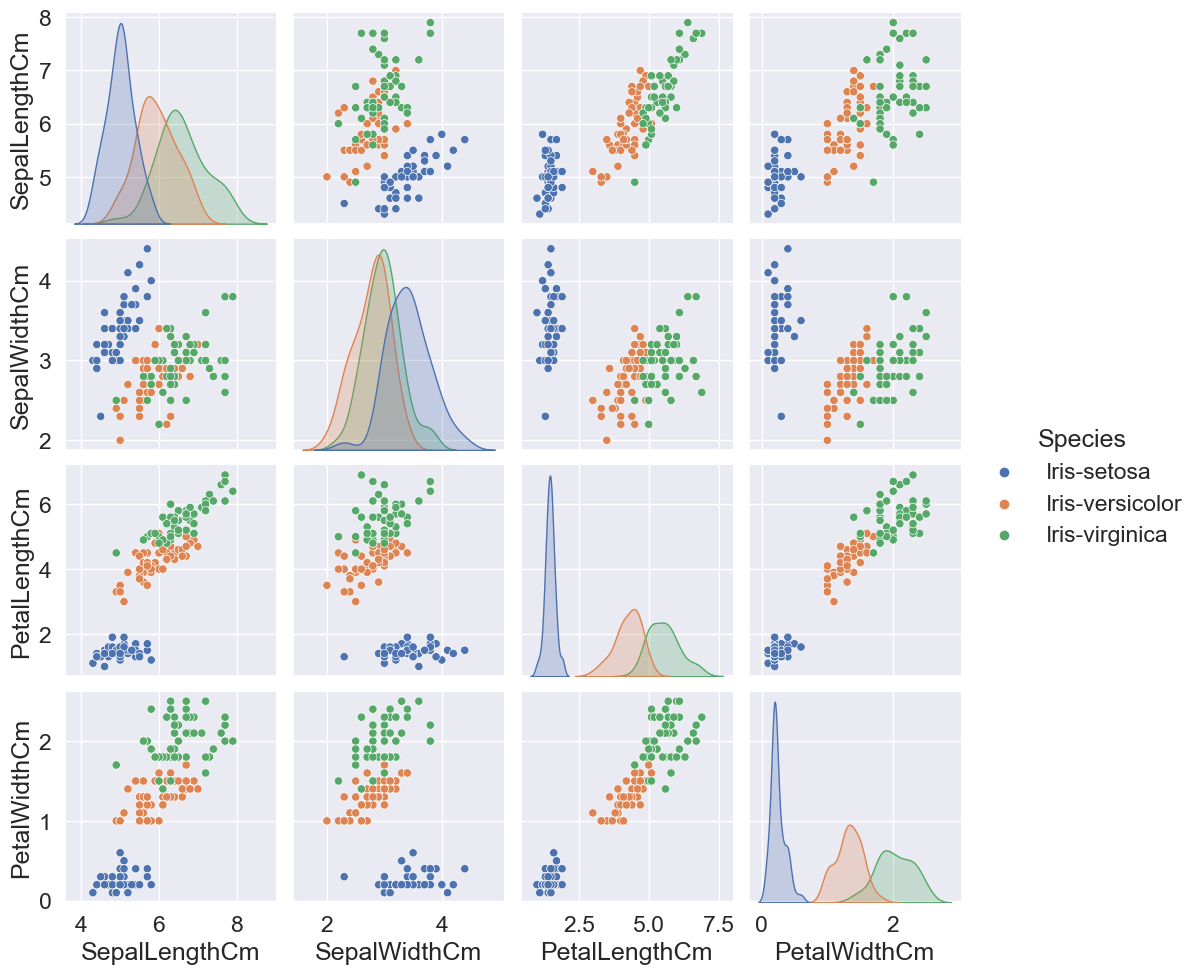

In [144]:
sns.pairplot(df,hue = 'Species');

**Observations** :
1. From analysis of above pair plot we can clearly distinguish Iris-setosa species from other two species.
2. From above pair plot we can not clearly distinguish between Iris-versicolor and Iris-virginica but still we can see some of the key factors or patterns to distinguish between this two species.
  


### Data Preapartion

In [145]:
X = df.drop('Species',axis = 1)
Y = df['Species']
X.shape, Y.shape

((150, 4), (150,))

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.20, random_state= 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((120, 4), (30, 4), (120,), (30,))

In [147]:
# Model Training
Model = DecisionTreeClassifier()
Model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [148]:
# Predict the test values with our trainned model
predict = Model.predict(X_test)

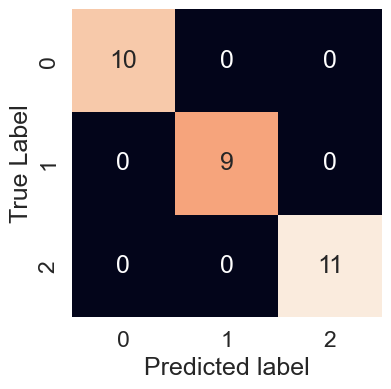

In [149]:
# Confusion Matrix
sns.set(font_scale = 1.5)
def plot_conf_mat(Y_test, predict):
    fig, ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(confusion_matrix(Y_test, predict),annot = True, cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label") 

plot_conf_mat(Y_test, predict)

In [150]:
print(classification_report(Y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Final Statement** : With Decision Tree Classifier We can predict about all three species of Iris with 100 % accuracy and here we are getting best result so we dosent need to do hyper parameater tunning.

In [151]:
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(Model, out_file= dot_data, feature_names = df.columns , 
                filled= True, rounded= True,
                    special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalues())
Image(graph.create_png())


ModuleNotFoundError: No module named 'sklearn.externals.six'

In [152]:

df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')